In [1]:
%matplotlib inline
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import os
import shutil

In [2]:
# Create random data and store in feature matrix X and response vector y
#X, y = make_blobs(n_samples=1500, centers=[[2, 1], [-4, -2], [1, -4]], cluster_std=0.7)
data = np.load('feature_vector.npy')

# Standardize features by removing the mean and scaling to unit variance
data = StandardScaler().fit_transform(data)
file_full_path = np.load('data_imgs.npy')

epsilon = 300
minimum_samples = 2

In [3]:
""" 
Define function to change parameters and make it simple- 
    - epsilon is a float that describes the maximum distance between two samples for them to be considered as in same 
      neighbourhood.
    - minimum_samples is number of samples in a neighbourhood for a point to be considered as a core point.
    - data is our dataset
"""

' \nDefine function to change parameters and make it simple- \n    - epsilon is a float that describes the maximum distance between two samples for them to be considered as in same \n      neighbourhood.\n    - minimum_samples is number of samples in a neighbourhood for a point to be considered as a core point.\n    - data is our dataset\n'

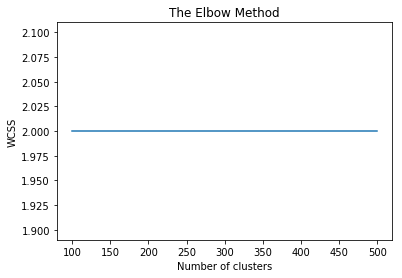

In [6]:
wcss =[]
for i in range (0,10):
    # Initialize DBSCAN with specified epsilon and min. samples. Fit the model with feature matrix X
    db = DBSCAN(eps=epsilon, min_samples=minimum_samples, 
                n_jobs = -1).fit(data)
    # Create an array of booleans using the labels from db
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

    # Replace all elements with 'True' in core_samples_mask that are in cluster, 'False' if points are outliers
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black color is removed and used for noise instead.
    # Remove repetition in labels by turning it into a set.
    unique_labels = set(labels)
    
    wcss.append(len(unique_labels))

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(100,500),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:

# Initialize DBSCAN with specified epsilon and min. samples. Fit the model with feature matrix X
db = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit(data)

# Create an array of booleans using the labels from db
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# Replace all elements with 'True' in core_samples_mask that are in cluster, 'False' if points are outliers
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black color is removed and used for noise instead.
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)


In [ ]:
n_clusters = len(unique_labels) 
cluster_data = 'dbscan_cluster_output'
for i in range(n_clusters) :
    path = os.path.join(cluster_data,str(i))    
    if not os.path.exists(path) :
        os.makedirs(path)
# For the outliers constructing -1 label
path = os.path.join(cluster_data,str(-1)) 
if not os.path.exists(path) :
        os.makedirs(path)

In [ ]:
for idx,label in enumerate(labels) :
    #print("File : {} , Label : {} ".format(file_full_path[idx],label))    
    shutil.copy(file_full_path[idx],os.path.join(cluster_data,str(label)))
